In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

100%|██████████| 9912422/9912422 [00:00<00:00, 102236277.32it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66962793.71it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30575449.05it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14142931.53it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
image, label = training_data[0]
label, image.shape

(5, torch.Size([1, 28, 28]))

In [ ]:
# How many samples are there?
len(training_data.data), len(training_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_name = training_data.classes
class_idx = training_data.class_to_idx

In [ ]:
class_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
training_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

Image shape: torch.Size([1, 28, 28])


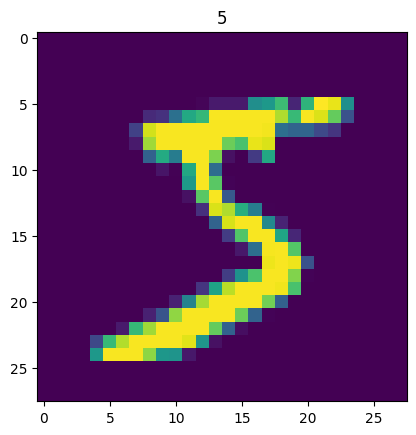

In [ ]:
import matplotlib.pyplot as plt
image, label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

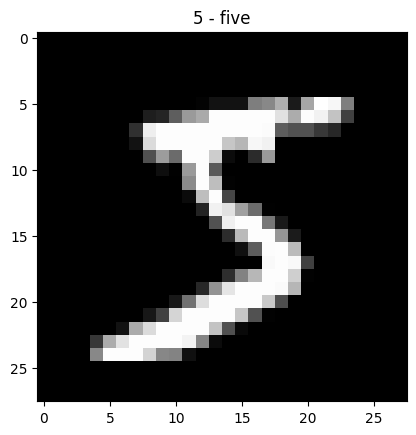

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label]);

# DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
train_features_batch

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.




# Build model BAI 1




In [ ]:
from torch import nn
class MNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = MNISTModel(input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
)
model_0.to("cpu")

MNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
x = model_0(train_features_batch)
out_put = nn.functional.softmax(x, dim=1)

In [ ]:
loss_fn(out_put, train_labels_batch)

tensor(2.2965, grad_fn=<NllLossBackward0>)

In [ ]:

torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.21331 | Test loss: 2.04607, Test acc: 54.46%

Epoch: 1

Train loss: 1.90814 | Test loss: 1.82984, Test acc: 66.26%

Epoch: 2

Train loss: 1.80364 | Test loss: 1.77267, Test acc: 72.24%

Epoch: 3

Train loss: 1.75761 | Test loss: 1.71752, Test acc: 79.23%

Epoch: 4

Train loss: 1.70087 | Test loss: 1.68439, Test acc: 80.96%

Epoch: 5

Train loss: 1.67964 | Test loss: 1.67008, Test acc: 81.54%

Epoch: 6

Train loss: 1.66864 | Test loss: 1.66172, Test acc: 81.93%

Epoch: 7

Train loss: 1.66154 | Test loss: 1.65645, Test acc: 82.09%

Epoch: 8

Train loss: 1.65640 | Test loss: 1.65174, Test acc: 82.32%

Epoch: 9

Train loss: 1.65233 | Test loss: 1.64813, Test acc: 82.44%



# Build model bài 2

In [ ]:
from torch import nn
class MNISTModel2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_2 = MNISTModel2(input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
)
model_2.to("cpu")

MNISTModel2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.05)

In [ ]:
torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_2(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_2(X)
            test_pred2 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred2, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred2.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30298 | Test loss: 2.30297, Test acc: 8.12%

Epoch: 1

Train loss: 2.30298 | Test loss: 2.30298, Test acc: 8.12%

Epoch: 2

Train loss: 2.30298 | Test loss: 2.30297, Test acc: 8.12%

Epoch: 3

Train loss: 2.30298 | Test loss: 2.30296, Test acc: 8.14%

Epoch: 4

Train loss: 2.30298 | Test loss: 2.30295, Test acc: 8.13%

Epoch: 5

Train loss: 2.30298 | Test loss: 2.30297, Test acc: 8.11%

Epoch: 6

Train loss: 2.30299 | Test loss: 2.30296, Test acc: 8.13%

Epoch: 7

Train loss: 2.30298 | Test loss: 2.30296, Test acc: 8.13%

Epoch: 8

Train loss: 2.30298 | Test loss: 2.30296, Test acc: 8.13%

Epoch: 9

Train loss: 2.30298 | Test loss: 2.30297, Test acc: 8.11%

